Decision trees model with clusters as labels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

Fetching prepared dataset

In [3]:
scaled_df = pd.read_csv('Dane/scaled_df_clusters.csv')

Checking prepered dataset

In [4]:
scaled_df.head()

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,ASCA,Anti_BP180,ASMA,IgG_IgE_receptor,Anti_SRP,Anti_La_SSB,Anti_Jo1,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_group,Cluster
0,0.712121,1,0.218487,0.016667,0.424000,0.596429,0.828276,0.966667,0.424,0.226667,0.632,0.534817,0.938889,0.160000,0.90750,0.7550,0.58,0.822857,0.216,1,0.482759,0.894444,0.816327,0.836364,0.78,0.310,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Linear IgA disease,7,7
1,0.651515,0,0.890756,0.612500,0.630667,0.456429,0.661887,0.656667,0.014,0.811111,0.284,0.574072,0.594000,0.922667,0.08250,0.1675,0.66,0.968049,0.384,1,0.572414,0.488889,0.469388,0.000000,0.14,0.273,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,Dermatomyositis,4,6
2,0.363636,0,0.050420,0.170833,0.488000,0.457857,0.441814,0.571667,0.922,0.893333,0.872,0.589949,0.464889,0.540333,0.62000,0.8300,0.57,1.000000,0.140,1,0.824138,0.677778,0.897959,0.500000,0.32,0.102,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ord's thyroiditis,8,3
3,0.409091,1,0.092437,0.445833,0.661333,0.292857,0.364788,0.236667,0.586,0.142222,0.516,0.462308,0.248889,0.620000,0.56750,0.5300,0.22,0.074418,0.790,1,0.224138,0.472222,0.510204,0.600000,0.32,0.545,0,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Restless legs syndrome,5,0
4,0.909091,1,0.252101,0.575000,0.161333,0.112857,0.605202,0.645000,0.058,0.922222,0.368,0.719465,0.351556,0.919000,0.13125,0.9000,0.90,0.918556,0.702,1,0.227586,0.522222,0.857143,0.300000,0.30,0.105,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),8,1


In [5]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499 entries, 0 to 12498
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   12499 non-null  float64
 1   Gender                                12499 non-null  int64  
 2   Sickness_Duration_Months              12499 non-null  float64
 3   RBC_Count                             12499 non-null  float64
 4   Hemoglobin                            12499 non-null  float64
 5   Hematocrit                            12499 non-null  float64
 6   MCV                                   12499 non-null  float64
 7   MCH                                   12499 non-null  float64
 8   MCHC                                  12499 non-null  float64
 9   RDW                                   12499 non-null  float64
 10  Reticulocyte_Count                    12499 non-null  float64
 11  WBC_Count      

Checking the number of cases in each cluster

In [67]:
scaled_df['Cluster'].value_counts()

Cluster
4    2594
5    1677
7    1554
1    1291
3    1263
2    1162
8    1150
0    1056
6     752
Name: count, dtype: int64

Input data

In [68]:
X = scaled_df.drop(['Diseases_group', 'Diseases_ID', 'Diseases_eng', 'Cluster'], axis=1)
y = scaled_df['Cluster']

First model with all features and SMOTE technique for unballanced classes

Using SMOTE for unbalanced classes

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Dividing data into training and test sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 42)

First model selection and training (Decision Trees) with all features

In [71]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Prediction on test dataset and model evaluation

In [72]:
y_pred = model.predict(X_test)
print("First model (all features):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

First model (all features):
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       488
           1       0.50      0.48      0.49       552
           2       0.60      0.64      0.62       525
           3       0.47      0.44      0.46       513
           4       1.00      1.00      1.00       492
           5       0.30      0.28      0.29       518
           6       0.55      0.54      0.54       538
           7       0.58      0.57      0.57       524
           8       0.52      0.51      0.51       520

    accuracy                           0.56      4670
   macro avg       0.56      0.56      0.56      4670
weighted avg       0.55      0.56      0.55      4670

Confusion Matrix:
[[272  37  34  44   0  46  29  26   0]
 [ 59 266  29   0   0  55  49  39  55]
 [ 28  38 336  30   1  26  17  23  26]
 [ 54   0  36 228   0  67  35  47  46]
 [  0   0   0   0 492   0   0   0   0]
 [ 57  69  36  68   0 147  44  33  64]
 [ 34  44  22  

Features importance in first model

Feature Importances:
                   Feature  Importance
25                     CRP    0.152021
41  General unwell feeling    0.032357
36             Weight loss    0.031554
16               Basophils    0.028959
24                      C4    0.028904
..                     ...         ...
43              Anti_dsDNA    0.001564
50             Anti_La_SSB    0.000000
57               Anti_OmpC    0.000000
58                   pANCA    0.000000
61                Anti_Mi2    0.000000

[65 rows x 2 columns]


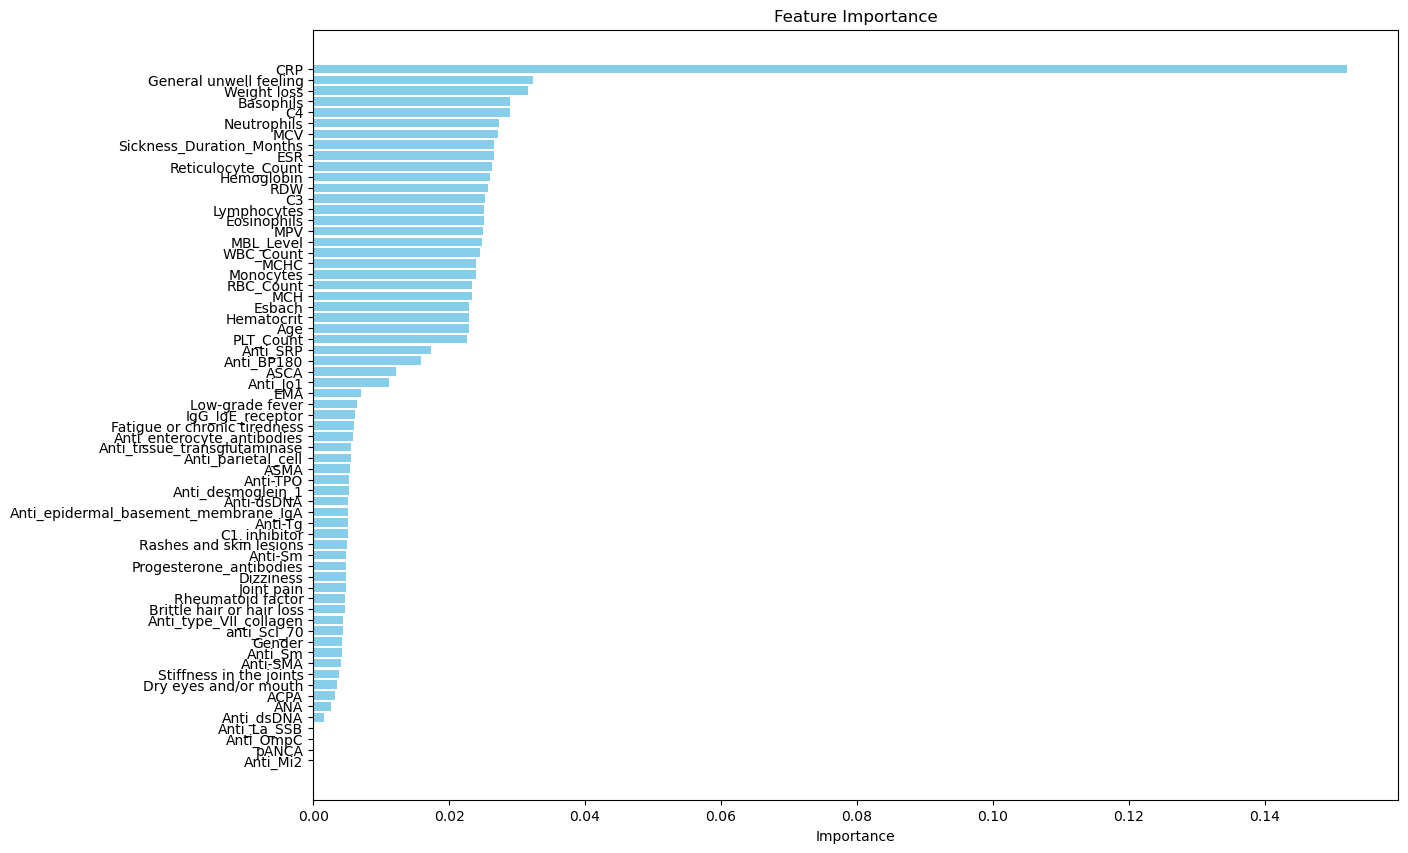

In [73]:
feature_importances = model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(features)

plt.figure(figsize=(14, 10))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [74]:
threshold = 0.01

important_features_idx = model.feature_importances_ > threshold

X_selected = X.iloc[:, important_features_idx]

selected_columns = X_selected.columns
print("Selected features (treshold > 0.01)")
print(selected_columns)

Selected features (treshold > 0.01)
Index(['Age', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin',
       'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count',
       'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PLT_Count', 'MPV', 'Esbach', 'MBL_Level', 'ESR', 'C3',
       'C4', 'CRP', 'Weight loss', 'General unwell feeling', 'ASCA',
       'Anti_BP180', 'Anti_SRP', 'Anti_Jo1'],
      dtype='object')


Second model with feature selection (different level of treshold was checked, optimal is 0.01) and SMOTE for unballanced classes. 

In [75]:
smote = SMOTE(random_state=42)
X_res_selected, y_res_selected = smote.fit_resample(X_selected, y)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_res_selected, y_res_selected, test_size=0.2, random_state=42
)


In [76]:
model.fit(X_train_selected, y_train_selected)
y_pred_selected = model.predict(X_test_selected)

In [77]:
print("Second model with selected features (threshold > 0.02):")
print(classification_report(y_test_selected, y_pred_selected))
print("Confusion Matrix:")
print(confusion_matrix(y_test_selected, y_pred_selected))

Second model with selected features (threshold > 0.02):
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       488
           1       0.56      0.55      0.56       552
           2       0.54      0.55      0.54       525
           3       0.56      0.59      0.58       513
           4       1.00      1.00      1.00       492
           5       0.35      0.34      0.34       518
           6       0.65      0.67      0.66       538
           7       0.49      0.47      0.48       524
           8       0.57      0.55      0.56       520

    accuracy                           0.59      4670
   macro avg       0.59      0.59      0.59      4670
weighted avg       0.58      0.59      0.58      4670

Confusion Matrix:
[[280  32  42  36   0  38  25  35   0]
 [ 31 303  35   0   0  61  34  45  43]
 [ 27  38 288  38   0  47  16  35  36]
 [ 37   0  26 304   0  47  26  37  36]
 [  0   0   0   0 492   0   0   0   0]
 [ 62  49  59  48   0 176 

Third model with feature selection but this time SMOTE technique was replaced with class weights

In [78]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [79]:
model_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_balanced.fit(X_train_selected, y_train_selected)
y_pred_selected = model_balanced.predict(X_test_selected)

In [81]:
print("Third model with selected features (threshold > 0.01, class_weight='balanced'):")
print(classification_report(y_test_selected, y_pred_selected))
print("Confusion Matrix:")
print(confusion_matrix(y_test_selected, y_pred_selected))

Third model with selected features (threshold > 0.01, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.22      0.24      0.23       204
           1       0.26      0.27      0.26       248
           2       0.24      0.21      0.22       245
           3       0.30      0.28      0.29       263
           4       0.99      1.00      1.00       518
           5       0.20      0.21      0.21       327
           6       0.26      0.24      0.25       169
           7       0.28      0.28      0.28       296
           8       0.22      0.23      0.23       230

    accuracy                           0.40      2500
   macro avg       0.33      0.33      0.33      2500
weighted avg       0.40      0.40      0.40      2500

Confusion Matrix:
[[ 48  28  15  28   0  49  13  23   0]
 [ 33  66  29   0   0  38  23  25  34]
 [ 21  35  52  26   2  37  17  28  27]
 [ 33   0  25  74   0  48  14  40  29]
 [  0   0   0   0 518   0   0   0   0]
 [

Fourth model with all features and unballanced classes

In [88]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)
model_full_no_balance = DecisionTreeClassifier(random_state=42)
model_full_no_balance.fit(X_train_full, y_train_full)
y_pred_full_no_balance = model_full_no_balance.predict(X_test_full)

In [89]:
print("Fourth model (all features, no balancing):")
print(classification_report(y_test_full, y_pred_full_no_balance))
print("Confusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full_no_balance))


Fourth model (all features, no balancing):
              precision    recall  f1-score   support

           0       0.24      0.22      0.23       204
           1       0.30      0.36      0.33       248
           2       0.58      0.58      0.58       245
           3       0.35      0.34      0.35       263
           4       0.99      1.00      1.00       518
           5       0.20      0.21      0.20       327
           6       0.26      0.23      0.24       169
           7       0.60      0.57      0.58       296
           8       0.29      0.27      0.28       230

    accuracy                           0.49      2500
   macro avg       0.42      0.42      0.42      2500
weighted avg       0.49      0.49      0.49      2500

Confusion Matrix:
[[ 45  37  17  34   0  44  15  12   0]
 [ 22  89  14   0   0  56  18  18  31]
 [ 14  17 142  14   2  22   7  12  15]
 [ 33   0  17  89   0  57  16  21  30]
 [  0   0   0   0 518   0   0   0   0]
 [ 37  58  17  51   1  69  27  22  45]


Fifth model with feature selection and unballanced classes

In [90]:
model_selected_no_balance = DecisionTreeClassifier(random_state=42)
model_selected_no_balance.fit(X_train_selected, y_train_selected)
y_pred_selected_no_balance = model_selected_no_balance.predict(X_test_selected)

In [91]:
print("Fifth model (selected features, threshold > 0.02, no balancing):")
print(classification_report(y_test_selected, y_pred_selected_no_balance))
print("Confusion Matrix:")
print(confusion_matrix(y_test_selected, y_pred_selected_no_balance))

Fifth model (selected features, threshold > 0.02, no balancing):
              precision    recall  f1-score   support

           0       0.19      0.21      0.20       204
           1       0.24      0.26      0.25       248
           2       0.21      0.20      0.20       245
           3       0.28      0.25      0.27       263
           4       0.99      1.00      1.00       518
           5       0.16      0.16      0.16       327
           6       0.28      0.24      0.26       169
           7       0.24      0.25      0.24       296
           8       0.29      0.29      0.29       230

    accuracy                           0.39      2500
   macro avg       0.32      0.32      0.32      2500
weighted avg       0.39      0.39      0.39      2500

Confusion Matrix:
[[ 42  35  19  28   0  35  15  30   0]
 [ 32  65  31   0   0  51   8  34  27]
 [ 29  33  49  23   2  41   9  36  23]
 [ 37   0  38  67   0  44  20  29  28]
 [  0   0   0   0 518   0   0   0   0]
 [ 32  58  31  41

Best model is that with selected features (treshold = 0.01) and SMOTE technique for unballanced classes. For this model cross validation was conducted to check out results stability

Cross validation of the second model with selected features

In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(random_state=42), threshold=threshold, prefit=False)),
    ('model', DecisionTreeClassifier(random_state=42))
])

results = cross_validate(pipeline, X_res_selected, y_res_selected, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro'])

# Wyniki walidacji krzyżowej
print(f'Mean accuracy: {results["test_accuracy"].mean():.2f}')
print(f'Mean precision: {results["test_precision_macro"].mean():.2f}')
print(f'Mean recall: {results["test_recall_macro"].mean():.2f}')

Mean accuracy: 0.60
Mean precision: 0.60
Mean recall: 0.60


Results are stable

In [93]:
import sklearn

sklearn.set_config(display='diagram')

pipeline


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=42),
                                 threshold=0.01)),
                ('model', DecisionTreeClassifier(random_state=42))])

Now when we know that second classification model with clusters as a lables is the best and it's stable, we can conduct hiperparameters searching with RandomizedSearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

smote = SMOTE(random_state=42)
X_res_selected, y_res = smote.fit_resample(X_selected, y)

X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_res_selected, y_res_selected, test_size=0.2, random_state=42
)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 20),  
    'min_samples_split': randint(2, 10), 
    'min_samples_leaf': randint(1, 10) 
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=params,
    n_iter=50,  
    cv=5,       
    scoring='accuracy',  
    n_jobs=-1,  
    random_state=42  
)

random_search.fit(X_train_selected, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test_selected)
print("Test classification report:")
print(classification_report(y_test, y_test_pred))


Best parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best cross-validated accuracy: 0.5144032805024523
Test classification report:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       488
           1       0.50      0.56      0.53       552
           2       0.44      0.47      0.45       525
           3       0.46      0.57      0.51       513
           4       1.00      1.00      1.00       492
           5       0.31      0.26      0.29       518
           6       0.64      0.55      0.59       538
           7       0.52      0.36      0.42       524
           8       0.51      0.51      0.51       520

    accuracy                           0.54      4670
   macro avg       0.54      0.54      0.53      4670
weighted avg       0.54      0.54      0.53      4670




These classification models were created based on the labels of the grouping variable generated using k-means clustering. These models will be compared with classification models where the categories of the grouping variable were defined based on domain (medical) knowledge. Additionally, it should be noted that the disease groups created through clustering may present challenges in terms of their substantive interpretation. This will pose a problem in the context of the business objective for which the classification model is being built (classifying patients into different autoimmune disease groups based on symptoms and test results, as well as providing recommendations for further medical diagnosis and disease prevention